# 1. Install Dependencies and Setup

In [27]:
import tensorflow as tf
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [30]:
import cv2
import imghdr


data_dir = 'dataset'  # Update path to your dataset folder
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    class_path = os.path.join(data_dir, image_class)
    
    # Skip non-directory files like .DS_Store
    if not os.path.isdir(class_path):
        continue
    
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e: 
            print(f'Issue with image {image_path}')

Issue with image dataset/Train/Real
Issue with image dataset/Train/AI


# 3. Load Data

In [31]:
import numpy as np
from matplotlib import pyplot as plt

# Load dataset from directory
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 999 files belonging to 2 classes.


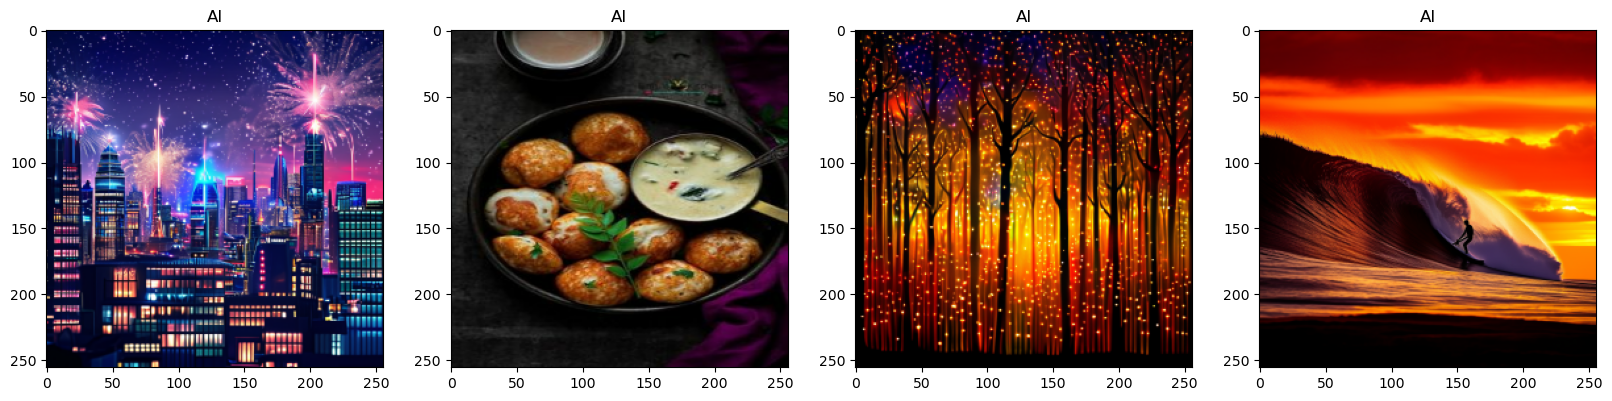

In [33]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text('Real' if batch[1][idx] == 0 else 'AI')

In [34]:
data = data.map(lambda x, y: (x / 255.0, y))
data.as_numpy_iterator().next()

(array([[[[2.90196091e-01, 3.21568638e-01, 3.33333343e-01],
          [3.08823526e-01, 3.40196073e-01, 3.51960778e-01],
          [3.08823526e-01, 3.40196073e-01, 3.51960778e-01],
          ...,
          [9.80392173e-02, 9.41176489e-02, 8.62745121e-02],
          [1.01960786e-01, 1.01960786e-01, 9.41176489e-02],
          [8.72549042e-02, 1.22549020e-01, 1.02941178e-01]],
 
         [[3.12745094e-01, 3.44117641e-01, 3.55882347e-01],
          [3.32352936e-01, 3.63725483e-01, 3.75490189e-01],
          [3.28431368e-01, 3.59803915e-01, 3.71568620e-01],
          ...,
          [9.70588252e-02, 9.31372568e-02, 8.52941200e-02],
          [1.13725491e-01, 1.13725491e-01, 1.05882354e-01],
          [9.01960805e-02, 1.25490203e-01, 1.05882354e-01]],
 
         [[3.38235289e-01, 3.69607836e-01, 3.81372541e-01],
          [3.46078426e-01, 3.77450973e-01, 3.89215678e-01],
          [3.53921562e-01, 3.85294110e-01, 3.97058815e-01],
          ...,
          [1.01960786e-01, 9.80392173e-02, 7.8431

In [35]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 4. Scale Data

# 5. Split Data

# 6. Build Deep Learning Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [37]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.7757 - loss: 0.6213 - val_accuracy: 0.7604 - val_loss: 0.5641
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.8031 - loss: 0.4824 - val_accuracy: 0.7969 - val_loss: 0.5036
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.7979 - loss: 0.4952 - val_accuracy: 0.7604 - val_loss: 0.5261
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.8086 - loss: 0.4360 - val_accuracy: 0.8438 - val_loss: 0.3836
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.8487 - loss: 0.3685 - val_accuracy: 0.8021 - val_loss: 0.4197
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 0.8688 - loss: 0.3398 - val_accuracy: 0.8177 - val_loss: 0.4479
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.9048 - loss: 0.2875 - val_accuracy: 0.8438 - val_loss: 0.3573
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.9058 - loss: 0.2221 - val_accuracy: 0.

# 8. Plot Performance

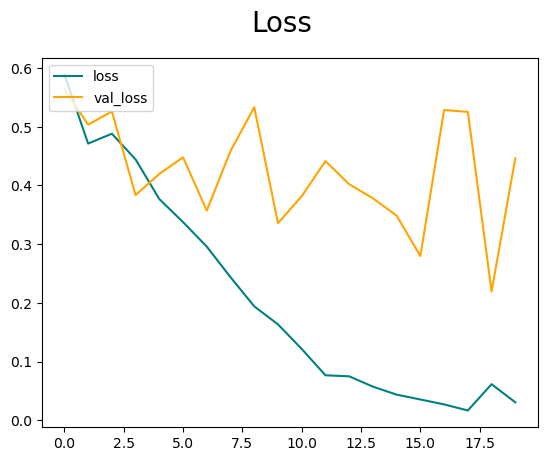

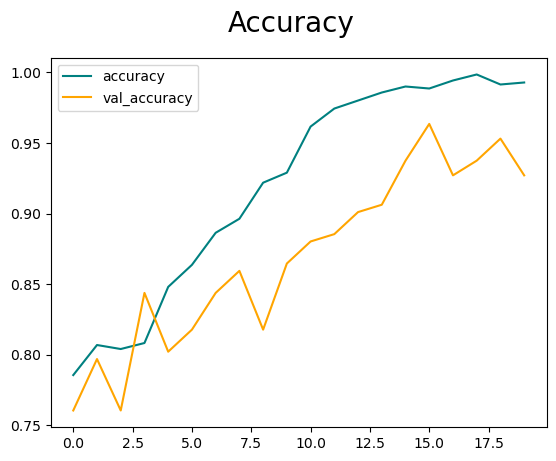

In [38]:
# Loss Plot
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Accuracy Plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Precision: 0.9620253443717957
Recall: 0.9743589758872986
Accuracy: 0.9479166865348816


2025-01-17 21:38:23.136227: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# 10. Test

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import BinaryCrossentropy

# Define a compatible loss function
def custom_loss(y_true, y_pred):
    return BinaryCrossentropy(reduction=tf.keras.losses.Reduction.SUM)(y_true, y_pred)

# Load the model with custom loss
model = load_model('models/real_vs_ai_classifier.h5', custom_objects={'custom_loss': custom_loss})

# Path to the test folder
test_folder = 'dataset/Test'  # Update this to the path of your test folder
output_csv = 'predictions.csv'

# Initialize a list to store the predictions
results = []

# Iterate over all images in the test folder in sorted order
for idx, image_file in enumerate(sorted(os.listdir(test_folder))):  # Sort ensures ordered processing
    # Construct the full image path
    image_path = os.path.join(test_folder, image_file)
    
    # Load and preprocess the image
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Unable to read image: {image_file}")
            continue
        
        # Resize image to the input size of the model and normalize
        resize = tf.image.resize(img, (256, 256))  
        img_array = resize.numpy() / 255.0
        
        # Predict the class
        yhat = model.predict(np.expand_dims(img_array, 0))[0][0]  # Get the prediction score
        
        # Determine the label
        label = 'AI' if yhat > 0.5 else 'Real'
        
        # Append the result, using an ordered ID
        results.append({'Id': f'image_{idx + 1}', 'Label': label})
    
    except Exception as e:
        print(f"Error processing image {image_file}: {e}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv(output_csv, index=False)

print(f"Predictions saved to {output_csv}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [43]:
yhat

array([[0.9872311]], dtype=float32)

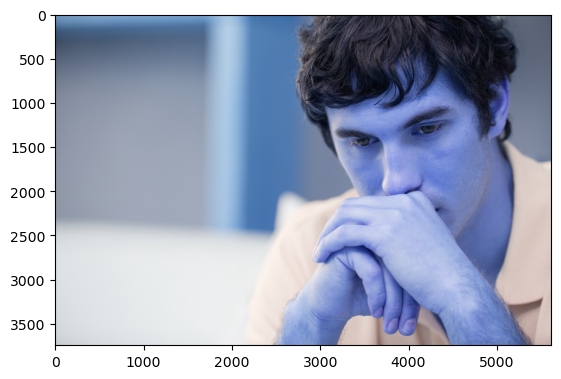

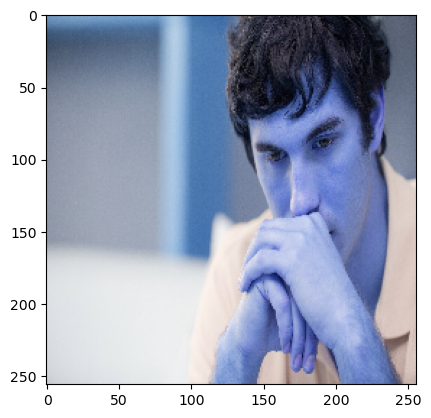

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class is AI


In [61]:

# Load and preprocess the image
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Predict the class
yhat = model.predict(np.expand_dims(resize / 255, 0))
if yhat > 0.5: 
    print(f'Predicted class is AI')
else:
    print(f'Predicted class is Real')

# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models', 'real_vs_ai_classifier.h5'))
new_model = load_model('models/real_vs_ai_classifier.h5')
new_model.predict(np.expand_dims(resize / 255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.9872311]], dtype=float32)

In [51]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [50]:
pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.7.0
    Uninstalling keras-3.7.0:
      Successfully uninstalled keras-3.7.0
Note: you may need to restart the kernel to use updated packages.
